In [13]:
import time
start = time.time()
import geopandas as gpd
import pandas as pd
from functools import reduce
import sys
'geopandas' in sys.modules
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import io
import pandas as pd
import networkx as nx
import osmnx as ox
from pyrosm import OSM, get_data
import time
import matplotlib.cm as cm
import matplotlib.colors as colors
from IPython.display import Image
from pprint import pprint
import math
from numpy import array
from networkx.algorithms import community
from operator import itemgetter

In [2]:
# Useful link
#https://notebook.community/gboeing/urban-data-science/21-Urban-Street-Networks/02-osmnx-network-analysis

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


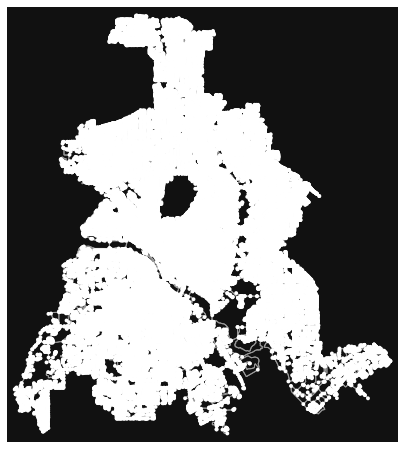

CPU times: total: 2min 3s
Wall time: 2min 6s


In [3]:
%%time
G = ox.graph_from_place('Dallas, Texas, USA', network_type='bike',simplify=True)
fig, ax = ox.plot_graph(G)

In [4]:
 # project graph then calculate its nodes’ convex hull area
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

1196776401.1515

In [5]:
%%time
# calculate and print basic network stats
stats = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True,
circuity_dist='euclidean')
pprint(stats)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\stats.py:370: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\stats.py:380: UserWarning: The `clean_intersects` and `tolerance` arguments have been deprecated and will be removed in a future release. Use the `clean_int_tol` argument instead.
  warnings.warn(msg)


{'circuity_avg': 1.0823844705401724,
 'clean_intersection_count': 48689,
 'clean_intersection_density_km': 40.68345595146512,
 'edge_density_km': 18988.0634779684,
 'edge_length_avg': 85.4483134569656,
 'edge_length_total': 22724466.27399926,
 'intersection_count': 89551,
 'intersection_density_km': 74.82684310439016,
 'k_avg': 5.26987020707421,
 'm': 265944,
 'n': 100930,
 'node_density_km': 84.33488486478207,
 'self_loop_proportion': 0.004742892360459819,
 'street_density_km': 10548.19823055818,
 'street_length_avg': 84.56707519628098,
 'street_length_total': 12623834.71700004,
 'street_segment_count': 149276,
 'streets_per_node_avg': 2.9651243436044785,
 'streets_per_node_counts': {0: 0,
                             1: 11379,
                             2: 677,
                             3: 69395,
                             4: 19070,
                             5: 383,
                             6: 25,
                             7: 1},
 'streets_per_node_proportions': {0: 

 stats : dict
        dictionary containing the following attributes
          - `circuity_avg` - see `circuity_avg` function documentation
          - `clean_intersection_count` - see `clean_intersection_count` function documentation
          - `clean_intersection_density_km` - `clean_intersection_count` per sq km
          - `edge_density_km` - `edge_length_total` per sq km
          - `edge_length_avg` - `edge_length_total / m`
          - `edge_length_total` - see `edge_length_total` function documentation
          - `intersection_count` - see `intersection_count` function documentation
          - `intersection_density_km` - `intersection_count` per sq km
          - `k_avg` - graph's average node degree (in-degree and out-degree)
          - `m` - count of edges in graph
          - `n` - count of nodes in graph
          - `node_density_km` - `n` per sq km
          - `self_loop_proportion` - see `self_loop_proportion` function documentation
          - `street_density_km` - `street_length_total` per sq km
          - `street_length_avg` - `street_length_total / street_segment_count`
          - `street_length_total` - see `street_length_total` function documentation
          - `street_segment_count` - see `street_segment_count` function documentation
          - `streets_per_node_avg` - see `streets_per_node_avg` function documentation
          - `streets_per_node_counts` - see `streets_per_node_counts` function documentation
          - `streets_per_node_proportions` - see `streets_per_node_proportions` function documentation

In [6]:
# calculate and print extended network stats
#more_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)
#for key in sorted(more_stats.keys()):
#    print(key)

In [7]:
# save the network model to disk as a shapefile and graphml
#https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=clean_intersection_density#module-osmnx.elevation
ox.save_graph_shapefile(G, 'Dallas_network_shapefile')
ox.save_graphml(G, 'Dallas_network.graphml')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [8]:
# Calculate Alpha, Beta, Gamma,eta and GTP index to evaluate the whole network
P=1
alpha=(stats['street_segment_count']-stats['n']+P)/(2*stats['n']-5)
beta=stats['street_segment_count']/stats['n']
gamma=stats['street_segment_count']/(3*(stats['n']-2))
eta=stats['edge_length_total']/stats['street_segment_count']
gtp=(stats['street_segment_count']-stats['n']+P)/((math.sqrt(stats['n'])-1)**2)

print('alpha:', alpha)
print('beta:', beta)
print('gamma:', gamma)
print('eta:', eta)
print('GTP:', gtp)
print('clean_intersection_density_km:',stats['clean_intersection_density_km'])
print('Average Circuity:',stats['circuity_avg'])

alpha: 0.23951351217458075
beta: 1.4790052511641731
gamma: 0.4930115197632636
eta: 152.2312111390931
GTP: 0.48204502498668533
clean_intersection_density_km: 40.68345595146512
Average Circuity: 1.0823844705401724


# Degree Centrality

In [9]:
%%time
# degree Centrality
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, "degree_centrality")

CPU times: total: 219 ms
Wall time: 214 ms


In [10]:
# get the mean closeness centrality
from numpy import array
print('min_dc:', array([degree_centrality[k] for k in degree_centrality]).min())
print('mean_dc:',array([degree_centrality[k] for k in degree_centrality]).mean())
print('max_dc:',array([degree_centrality[k] for k in degree_centrality]).max())
print('std_dc:',array([degree_centrality[k] for k in degree_centrality]).std())

min_dc: 9.9079550971475e-06
mean_dc: 5.221363737948668e-05
max_dc: 0.000138711371360065
std_dc: 1.644166246962916e-05


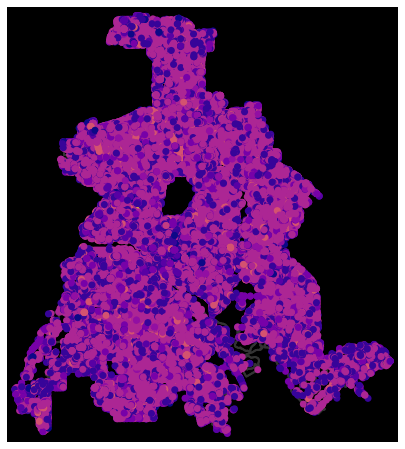

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [11]:
# plot the graph, coloring nodes by betweenness centrality
nc = ox.plot.get_node_colors_by_attr(G, "degree_centrality", cmap="plasma")
fig, ax = ox.plot_graph(
    G, bgcolor="k", node_color=nc, node_size=50, edge_linewidth=2, edge_color="#333333"
)

# save graph to shapefile, geopackage, or graphml
ox.save_graph_shapefile(G, "Degree_Centrality_Dallas_shapefile")

# Closeness Centrality of link

In [12]:
%%time
# calculate node closeness centrality of the line graph
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

CPU times: total: 1d 12h 3min 8s
Wall time: 1d 12h 4min 1s


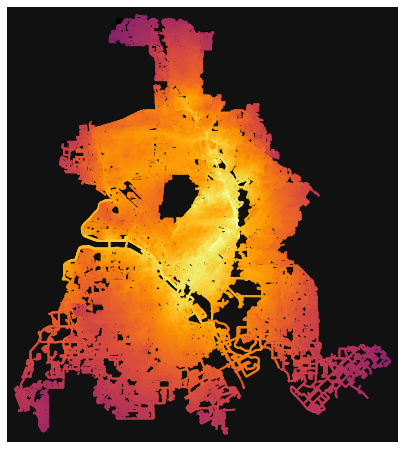

In [13]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

In [14]:
# get the mean closeness centrality
from numpy import array
print('min_ec:', array([edge_centrality[k] for k in edge_centrality]).min())
print('mean_ec:',array([edge_centrality[k] for k in edge_centrality]).mean())
print('max_ec:',array([edge_centrality[k] for k in edge_centrality]).max())
print('std_ec:',array([edge_centrality[k] for k in edge_centrality]).std())

min_ec: 0.0
mean_ec: 0.007722682425751077
max_ec: 0.010949804089906994
std_ec: 0.0013879456584923763


In [15]:
# save graph to shapefile, geopackage, or graphml
ox.save_graph_shapefile(G, "Closeness_Centrality_Dallas_shapefile")

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:109: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)


In [16]:
# # make a list of graph edge centrality values
# ev = [edge_centrality[edge (0,)] for edge in G.edges()]
# # create a color scale converted to list of colors for graph edges
# norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
# cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
# ec = [cmap.to_rgba(cl) for cl in ev]
# # color the edges in the original graph by closeness centrality in line graph
# fig, ax = ox.plot_graph(G, bgcolor='black', axis_off=True, node_size=0,
# edge_color=ec, edge_linewidth=2, edge_alpha=1)

# Closeness Centrality of  node

In [17]:
%%time
# calculate node closeness centrality of the line graph
node_centrality = nx.closeness_centrality((G))
nx.set_node_attributes(G, node_centrality, "node_centrality")

CPU times: total: 3h 34min 14s
Wall time: 3h 34min 18s


In [18]:
print('min_ncc:', array([node_centrality[k] for k in node_centrality]).min())
print('mean_ncc:',array([node_centrality[k] for k in node_centrality]).mean())
print('max_ncc:',array([node_centrality[k] for k in node_centrality]).max())
print('std_ncc:',array([node_centrality[k] for k in node_centrality]).std())

min_ncc: 0.0
mean_ncc: 0.007721678489393183
max_ncc: 0.0109742706574662
std_ncc: 0.0014422263110049616


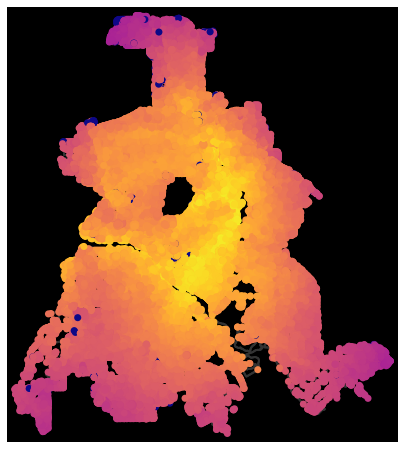

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:109: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)


In [19]:
# plot the graph, coloring nodes by node closeness centrality
ncc = ox.plot.get_node_colors_by_attr(G, "node_centrality", cmap="plasma")
fig, ax = ox.plot_graph(
    G, bgcolor="k", node_color=ncc, node_size=50, edge_linewidth=2, edge_color="#333333"
)

# save graph to shapefile, geopackage, or graphml
ox.save_graph_shapefile(G, "Node_closeness_Centrality_Dallas_shapefile")

# Betweenness Centrality

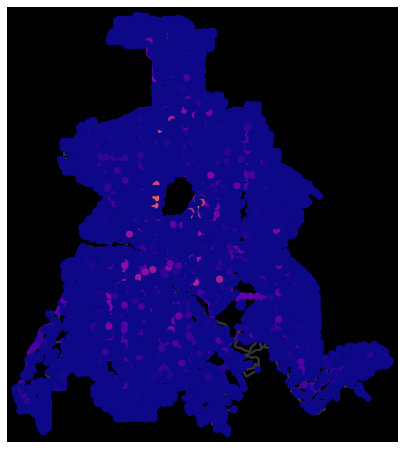

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:109: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)


CPU times: total: 23h 26min 17s
Wall time: 23h 27min 2s


In [20]:
%%time
# Betweenness Centrality
#https://networkx.org/documentation/stable/auto_examples/geospatial/plot_osmnx.html
#https://github.com/gboeing/osmnx-examples/blob/main/notebooks/06-stats-indicators-centrality.ipynb
# impute edge (cycling) speeds and calculate edge traversal times
ox.config(use_cache=True, log_console=True)
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# convert MultiDiGraph to DiGraph to use nx.betweenness_centrality function
# choose between parallel edges by minimizing travel_time attribute value
D = ox.utils_graph.get_digraph(G, weight="travel_time")

# calculate node betweenness centrality, weighted by travel time
bc = nx.betweenness_centrality(D, weight="travel_time", normalized=True)
nx.set_node_attributes(G, values=bc, name="bc")

# plot the graph, coloring nodes by betweenness centrality
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot_graph(
    G, bgcolor="k", node_color=nc, node_size=50, edge_linewidth=2, edge_color="#333333"
)

# save graph to shapefile, geopackage, or graphml
ox.save_graph_shapefile(G, "Betweenness_Centrality_Dallas_shapefile")

In [21]:
max_node, max_bc = max(bc.items(), key=lambda x: x[1])
max_node, max_bc

(81682097, 0.09498756050648487)

In [22]:
print('min_bc:', array([bc[k] for k in bc]).min())
print('mean_bc:',array([bc[k] for k in bc]).mean())
print('max_bc:',array([bc[k] for k in bc]).max())
print('std_bc:',array([bc[k] for k in bc]).std())

min_bc: 0.0
mean_bc: 0.0023749947319700354
max_bc: 0.09498756050648487
std_bc: 0.006802753509941068


# In the city of Dallas, TX, the node 81682097 with the highest betweenness centrality has ~9.4% of all shortest paths running through it. Let's highlight it in the plot:

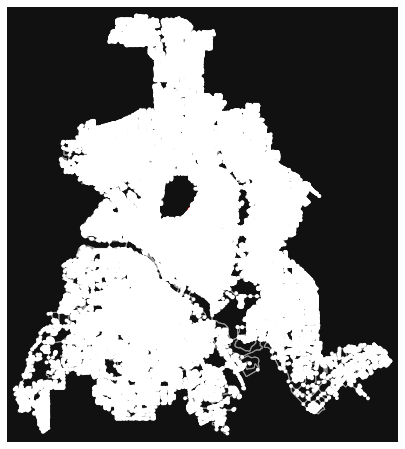

In [23]:
nc = ["r" if node == max_node else "w" for node in G.nodes]
ns = [80 if node == max_node else 15 for node in G.nodes]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

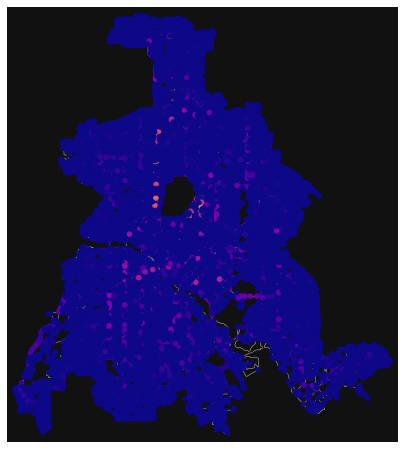

In [24]:
# add the betweenness centraliy values as new node attributes, then plot
nx.set_node_attributes(G, bc, "bc")
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=30,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="w",
)

Above, the nodes are visualized by betweenness centrality, from low (dark violet) to high (light yellow). The colors in the colorspace are linearly mapped to the attribute values.

# Eigenevector Centrality

In [5]:
# impute edge (cycling) speeds and calculate edge traversal times
ox.config(use_cache=True, log_console=True)
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# convert MultiDiGraph to DiGraph to use nx.betweenness_centrality function
# choose between parallel edges by minimizing travel_time attribute value
D = ox.utils_graph.get_digraph(G, weight="travel_time")

In [6]:
%%time
Eigene_centrality = nx.eigenvector_centrality(D,weight="travel_time",tol=1.0e-3)
nx.set_node_attributes(G, values=Eigene_centrality, name="Eigene_centrality")

CPU times: total: 1.19 s
Wall time: 1.18 s


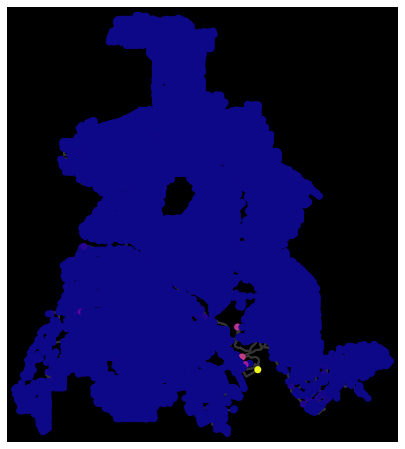

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:109: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)


In [7]:
# plot the graph, coloring nodes by betweenness centrality
ec = ox.plot.get_node_colors_by_attr(G, "Eigene_centrality", cmap="plasma")
fig, ax = ox.plot_graph(
    G, bgcolor="k", node_color=ec, node_size=50, edge_linewidth=2, edge_color="#333333"
)

# save graph to shapefile, geopackage, or graphml
ox.save_graph_shapefile(G, "Eigenvector_Centrality_Dallas_shapefile")

In [11]:

print('min_ec:', array([Eigene_centrality[k] for k in Eigene_centrality]).min())
print('mean_ec:',array([Eigene_centrality[k] for k in Eigene_centrality]).mean())
print('max_ec:',array([Eigene_centrality[k] for k in Eigene_centrality]).max())
print('std_ec:',array([Eigene_centrality[k] for k in Eigene_centrality]).std())

min_ec: 9.989865743231072e-10
mean_ec: 9.277810989768909e-05
max_ec: 0.7140931114449802
std_ec: 0.003146307224806524


# Advanced NetworkX: Community detection with modularity 
#https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python

In [14]:
communities = community.greedy_modularity_communities(G)

In [15]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

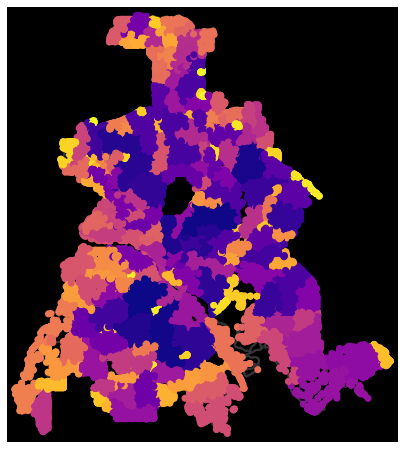

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:109: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)


In [16]:
# plot the graph, coloring nodes by betweenness centrality
mu = ox.plot.get_node_colors_by_attr(G, "modularity", cmap="plasma")
fig, ax = ox.plot_graph(
    G, bgcolor="k", node_color=mu, node_size=50, edge_linewidth=2, edge_color="#333333"
)

# save graph to shapefile, geopackage, or graphml
ox.save_graph_shapefile(G, "Modularity_Dallas_shapefile")